In [1]:
!pip install tensorflow_datasets


In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow_datasets as tfds
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [3]:
dataset,info=tfds.load('cats_vs_dogs',with_info='True',as_supervised='True')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete0PWGLJ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [6]:
info.features['label'].names

['cat', 'dog']

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [40]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                      

In [43]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])




train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [97]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=5,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/5


<ipython-input-97-e6912f10756e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=5,validation_data=test_generator,validation_steps=test_generator.samples//20)


27/27 [==============================] - 50s 2s/step - loss: 0.1401 - accuracy: 0.9721 - val_loss: 7.9975 - val_accuracy: 0.5786
Epoch 2/5
27/27 [==============================] - 49s 2s/step - loss: 0.1961 - accuracy: 0.9758 - val_loss: 11.7408 - val_accuracy: 0.5643
Epoch 3/5
27/27 [==============================] - 49s 2s/step - loss: 0.6099 - accuracy: 0.9721 - val_loss: 9.1771 - val_accuracy: 0.5500
Epoch 4/5
27/27 [==============================] - 52s 2s/step - loss: 0.4273 - accuracy: 0.9683 - val_loss: 9.7689 - val_accuracy: 0.5214
Epoch 5/5
27/27 [==============================] - 50s 2s/step - loss: 0.5187 - accuracy: 0.9497 - val_loss: 9.2614 - val_accuracy: 0.5929


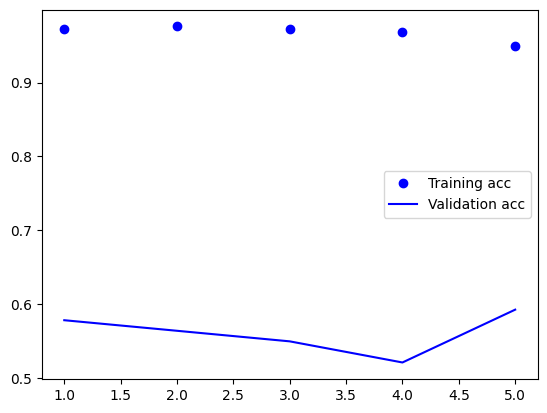

In [98]:



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

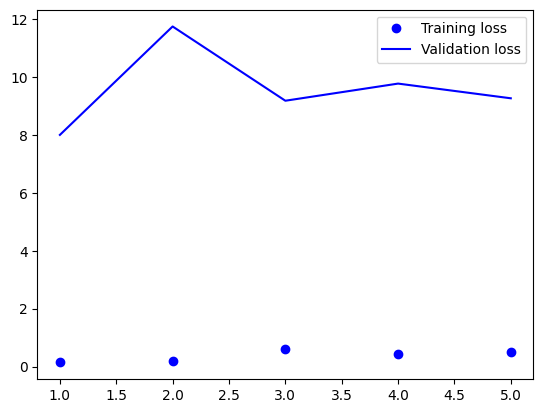

In [99]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [100]:
model.save('catvsdog.h5')

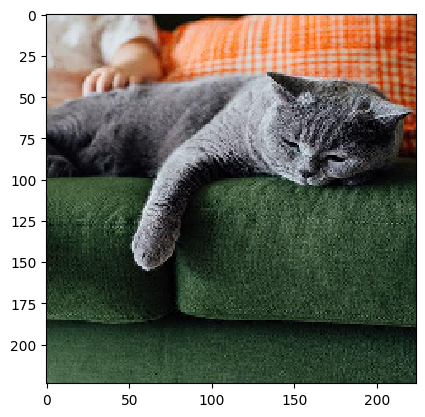

In [105]:
from tensorflow.keras.preprocessing import image
path ='/content/drive/MyDrive/test/cats/cat_114.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [106]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [107]:
img_array=img_array.reshape(1,224,224,3)

In [108]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 45ms/step
cat
